In [2]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import math
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#load data from file

data = pd.read_csv('my_data.csv')
data = data.as_matrix()

In [4]:
train = data[:,:11]
train[train==-1] = 0
mean = np.mean(train,axis=0)
mean = mean.reshape(1,11)
for i in range(11):
    train[train[:,i]==0,i] = mean[0,i]
    pass
print(train[:10,:])

[[1 1136070024 203761 138467 1 138371 98652 1 259200 76317.90602113931 1]
 [2 1136070690 9729.77218340525 11 1 4 35848 1 259200 76317.90602113931 1]
 [3 1136071207 117 201203 1 18882.1760718103 254212.10202486045 1 259200
  76317.90602113931 1]
 [4 1136071267 4406 196985 1 18882.1760718103 254212.10202486045 1 259200
  76317.90602113931 1]
 [5 1136071269 202516 19520 1 18731 522268 1 259200 76317.90602113931 1]
 [6 1136072890 1 46 1 3 49216 1 900 76317.90602113931 1]
 [7 1136074263 2629516 21 1 18882.1760718103 35712 1 5400 76317.90602113931
  1]
 [8 1136074695 1 197831 1 18882.1760718103 254212.10202486045 1 259200
  76317.90602113931 1]
 [9 1136074754 2 197682 1 18882.1760718103 254212.10202486045 1 259200
  76317.90602113931 1]
 [10 1136074756 2 197552 1 18882.1760718103 254212.10202486045 1 259200
  76317.90602113931 1]]


In [5]:
print(train[:10,:])


[[1 1136070024 203761 138467 1 138371 98652 1 259200 76317.90602113931 1]
 [2 1136070690 9729.77218340525 11 1 4 35848 1 259200 76317.90602113931 1]
 [3 1136071207 117 201203 1 18882.1760718103 254212.10202486045 1 259200
  76317.90602113931 1]
 [4 1136071267 4406 196985 1 18882.1760718103 254212.10202486045 1 259200
  76317.90602113931 1]
 [5 1136071269 202516 19520 1 18731 522268 1 259200 76317.90602113931 1]
 [6 1136072890 1 46 1 3 49216 1 900 76317.90602113931 1]
 [7 1136074263 2629516 21 1 18882.1760718103 35712 1 5400 76317.90602113931
  1]
 [8 1136074695 1 197831 1 18882.1760718103 254212.10202486045 1 259200
  76317.90602113931 1]
 [9 1136074754 2 197682 1 18882.1760718103 254212.10202486045 1 259200
  76317.90602113931 1]
 [10 1136074756 2 197552 1 18882.1760718103 254212.10202486045 1 259200
  76317.90602113931 1]]


In [6]:
#preprocess data
def preprocess(train):
    data_min = np.min(train,axis=0)
    data_max = np.max(train,axis=0)
    data_min = data_min.reshape(1,11)
    data_max = data_max.reshape(1,11)
    norm = data_max - data_min
    print(data_max)
    print(data_min)
    print(norm)
    train_norm = (train - data_min) / (norm + 1e-5)
    return train_norm

In [7]:
train_data = preprocess(train)



[[404176 1167605790 4345394 1575814 1 259316 3667652 1 345600 1126400 5]]
[[1 1136070024 1 1 0.8600485926922925 1 1700 1 600 76317.90602113931 1]]
[[404175 31535766 4345393 1575813 0.1399514073077075 259315 3665952 0
  345000 1050082.0939788606 4]]


In [8]:
num_training = 10000
num_validation = 1000

X_train = train_data[:11000,:]
mask = range(num_training,num_training + num_validation)
X_val = X_train[mask]
mask = range(num_training)
X_train = X_train[mask]
X_test = train_data[15000:20000,:]

In [9]:

# 4 column is the burst time 
y_train = X_train[:,3].reshape(-1,1)
y_val = X_val[:,3].reshape(-1,1)
y_test = X_test[:,3].reshape(-1,1)

#removing column 4 from input
X_train = np.delete(X_train,3,1)
X_val = np.delete(X_val,3,1)
X_test = np.delete(X_test,3,1)


In [10]:
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (10000, 10)
Train labels shape:  (10000, 1)
Validation data shape:  (1000, 10)
Validation labels shape:  (1000, 1)
Test data shape:  (5000, 10)
Test labels shape:  (5000, 1)


In [11]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None,10])
y = tf.placeholder(tf.int64, [None,1])
is_training = tf.placeholder(tf.bool)

#variables 
gamma1 = tf.get_variable("gamma1",shape=[64])
beta1 = tf.get_variable("beta1",shape=[64])

gamma2 = tf.get_variable("gamma2",shape=[128])
beta2 = tf.get_variable("beta2",shape=[128])

gamma3 = tf.get_variable("gamma3",shape=[256])
beta3 = tf.get_variable("beta3",shape=[256])

gamma4 = tf.get_variable("gamma4",shape=[1024])
beta4 = tf.get_variable("beta4",shape=[1024])




In [12]:
def my_model(X,y,is_training):
    
    
    if is_training is not None:
        
        #dense1,batchnorm1,dropout1
        dense1 = tf.layers.dense(inputs=X,units=64,activation=tf.nn.relu)
        mean,var = tf.nn.moments(dense1,axes=0)
        batchnorm1 = tf.nn.batch_normalization(dense1,mean,var,beta1,gamma1,1e-5)
        dropout1 = tf.nn.dropout(batchnorm1,keep_prob=0.5)
        
        #dense2,batchnorm2,dropout2
        dense2 = tf.layers.dense(inputs=dropout1,units=128,activation=tf.nn.relu)
        mean,var = tf.nn.moments(dense2,axes=0)
        batchnorm2 = tf.nn.batch_normalization(dense2,mean,var,beta2,gamma2,1e-5)
        dropout2 = tf.nn.dropout(batchnorm2,keep_prob=0.5)
        
        #dense3,batchnorm3,dropout3
        dense3 = tf.layers.dense(inputs=dropout2,units=256,activation=tf.nn.relu)
        mean,var = tf.nn.moments(dense3,axes=0)
        batchnorm3 = tf.nn.batch_normalization(dense3,mean,var,beta3,gamma3,1e-5)
        dropout3 = tf.nn.dropout(batchnorm3,keep_prob=0.5)
        
        #dense4,batchnorm4,dropout4
        dense4 = tf.layers.dense(inputs=dropout3,units=1024,activation=tf.nn.relu)
        mean,var = tf.nn.moments(dense4,axes=0)
        batchnorm4 = tf.nn.batch_normalization(dense4,mean,var,beta4,gamma4,1e-5)
        dropout4 = tf.nn.dropout(batchnorm4,keep_prob=0.5)
        
    
        #output layer
        output = tf.layers.dense(inputs=dropout4,units=1,activation=tf.nn.sigmoid)
        pass
    
    else:
        dense1 = tf.layers.dense(inputs=X,units=64,activation=tf.nn.relu)
        dense2 = tf.layers.dense(inputs=dense1,units=128,activation=tf.nn.relu)
        dense3 = tf.layers.dense(inputs=dense2,units=256,activation=tf.nn.relu)
        dense4 = tf.layers.dense(inputs=dense3,units=1024,activation=tf.nn.relu)
        
        #output layer
        output = tf.layers.dense(inputs=dense4,units=1,activation=tf.nn.relu)
        pass
    
    return output

In [13]:
y_out = my_model(X,y,is_training)

total_loss = tf.losses.absolute_difference(y_out,y)
mean_loss = tf.reduce_mean(total_loss)

optimizer = tf.train.AdamOptimizer(1e-3)


train_step = optimizer.minimize(mean_loss)

Training
Iteration 0: with minibatch training loss = 0.494 and accuracy of 64
Iteration 100: with minibatch training loss = 0.0058 and accuracy of 64
Epoch 1, Overall loss = 0.0677 and accuracy of 63.9


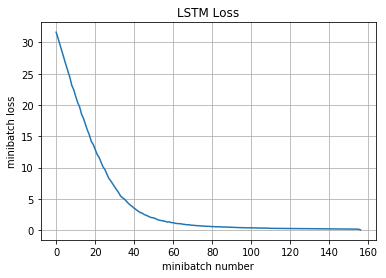

Validation
Epoch 1, Overall loss = 0.00252 and accuracy of 63
Test
Epoch 1, Overall loss = 0.00248 and accuracy of 63.9


In [21]:
def run_model(session, predict, loss_val, Xd, yd,
              epochs=1, batch_size=64, print_every=100,
              training=None, plot_losses=False):
    # have tensorflow compute accuracy
    correct_prediction = tf.equal(tf.argmax(predict,1), y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    # shuffle indicies
    train_indicies = np.arange(Xd.shape[0])
    np.random.shuffle(train_indicies)

    training_now = training is not None
    
    # setting up variables we want to compute (and optimizing)
    # if we have a training function, add that to things we compute
    variables = [mean_loss,correct_prediction,accuracy]
    if training_now:
        variables[-1] = training
    
    # counter 
    iter_cnt = 0
    for e in range(epochs):
        # keep track of losses and accuracy
        correct = 0
        losses = []
        total_loss_list = []
        epoch_list = []
        
        # make sure we iterate over the dataset once
        for i in range(int(math.ceil(Xd.shape[0]/batch_size))):
            # generate indicies for the batch
            start_idx = (i*batch_size)%Xd.shape[0]
            idx = train_indicies[start_idx:start_idx+batch_size]
            
            # create a feed dictionary for this batch
            feed_dict = {X: Xd[idx,:],
                         y: yd[idx],
                         is_training: training_now }
            # get batch size
            actual_batch_size = yd[idx].shape[0]
            
            # have tensorflow compute loss and correct predictions
            # and (if given) perform a training step
            loss, corr, _ = session.run(variables,feed_dict=feed_dict)
            
            # aggregate performance stats
            losses.append(loss*actual_batch_size)
            correct += np.sum(corr)
            
            # print every now and then
            if training_now and (iter_cnt % print_every) == 0:
                print("Iteration {0}: with minibatch training loss = {1:.3g} and accuracy of {2:.2g}"\
                      .format(iter_cnt,loss,np.sum(corr)/actual_batch_size))
            iter_cnt += 1
        total_correct = correct/Xd.shape[0]
        total_loss = np.sum(losses)/Xd.shape[0]
        
        total_loss_list.append(total_loss)
        epoch_list.append(e)
        print("Epoch {2}, Overall loss = {0:.3g} and accuracy of {1:.3g}"\
              .format(total_loss,total_correct,e+1))
        if plot_losses:
            plt.plot(losses)
            plt.grid(True)
            plt.title('LSTM Loss'.format(e+1))
            plt.xlabel('minibatch number')
            plt.ylabel('minibatch loss')
            plt.show()
            pass
        
    return total_loss,total_correct

with tf.Session() as sess:
    with tf.device("/cpu:0"): #"/cpu:0" or "/gpu:0" 
        sess.run(tf.global_variables_initializer())
        print('Training')
        run_model(sess,y_out,mean_loss,X_train,y_train,1,64,100,train_step,True)
        print('Validation')
        run_model(sess,y_out,mean_loss,X_val,y_val,1,64)
        print('Test')
        run_model(sess,y_out,mean_loss,X_test,y_test,1,64)

Training
Iteration 0: with minibatch training loss = 0.51 and accuracy of 64
Iteration 100: with minibatch training loss = 0.00587 and accuracy of 64
Epoch 1, Overall loss = 0.0705 and accuracy of 63.9


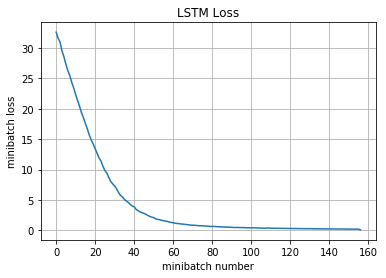

Iteration 200: with minibatch training loss = 0.00164 and accuracy of 64
Iteration 300: with minibatch training loss = 0.000795 and accuracy of 64
Epoch 2, Overall loss = 0.00139 and accuracy of 63.9


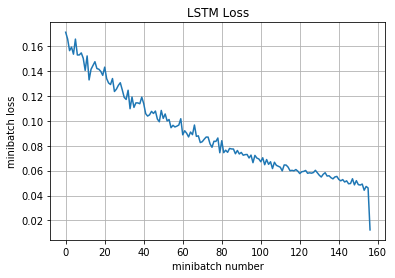

Iteration 400: with minibatch training loss = 0.000454 and accuracy of 64
Epoch 3, Overall loss = 0.000512 and accuracy of 63.9


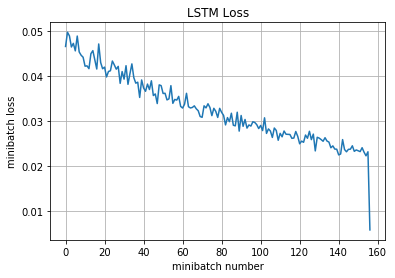

Iteration 500: with minibatch training loss = 0.000338 and accuracy of 64
Iteration 600: with minibatch training loss = 0.000238 and accuracy of 64
Epoch 4, Overall loss = 0.000269 and accuracy of 63.9


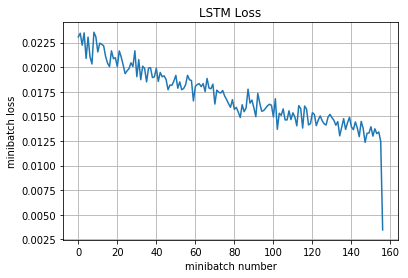

Iteration 700: with minibatch training loss = 0.000161 and accuracy of 64
Epoch 5, Overall loss = 0.000166 and accuracy of 63.9


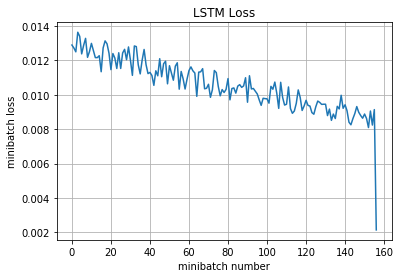

Iteration 800: with minibatch training loss = 0.000119 and accuracy of 64
Iteration 900: with minibatch training loss = 0.000113 and accuracy of 64
Epoch 6, Overall loss = 0.000113 and accuracy of 63.9


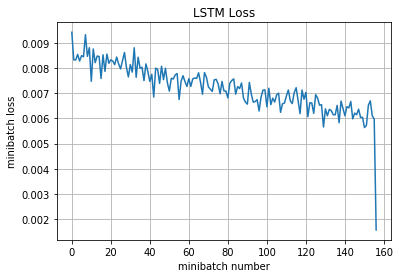

Iteration 1000: with minibatch training loss = 9.13e-05 and accuracy of 64
Epoch 7, Overall loss = 8.1e-05 and accuracy of 63.9


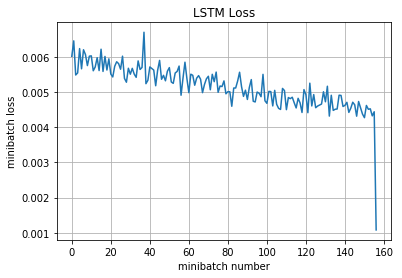

Iteration 1100: with minibatch training loss = 6.73e-05 and accuracy of 64
Iteration 1200: with minibatch training loss = 6.08e-05 and accuracy of 64
Epoch 8, Overall loss = 6.2e-05 and accuracy of 63.9


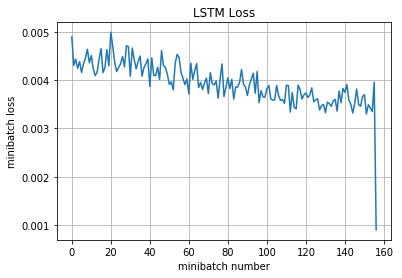

Iteration 1300: with minibatch training loss = 5.22e-05 and accuracy of 64
Iteration 1400: with minibatch training loss = 4.14e-05 and accuracy of 64
Epoch 9, Overall loss = 4.77e-05 and accuracy of 63.9


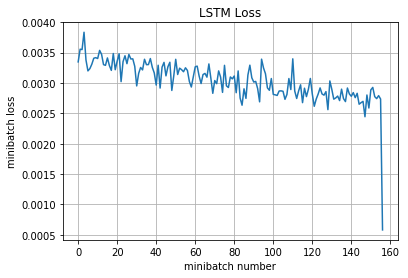

Iteration 1500: with minibatch training loss = 3.49e-05 and accuracy of 64
Epoch 10, Overall loss = 3.79e-05 and accuracy of 63.9


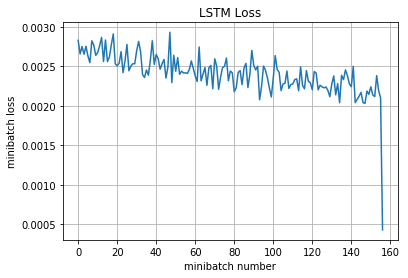

Validation
Epoch 1, Overall loss = 3.44e-05 and accuracy of 63


(3.4438140195561572e-05, 63.039999999999999)

In [22]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())
print('Training')
run_model(sess,y_out,mean_loss,X_train,y_train,10,64,100,train_step,True)
print('Validation')
run_model(sess,y_out,mean_loss,X_val,y_val,1,64)